## Wrangling & Analyzing [WeRateDogs™](https://twitter.com/dog_rates) Twitter Data

<span style="color: gray; font-size:1em;">Mateusz Zajac</span>
<br><span style="color: gray; font-size:1em;">Feb-2019</span>

### Part I - Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. It was started in 2015 by college student Matt Nelson, and has received international media coverage both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter.
<br>
<br>WeRateDogs asks people to send photos of their dogs, then tweets selected photos rating and a humorous comment. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". Popular posts are re-posted on Instagram and Facebook.
<br>
<br>As of December 2018, the Twitter account has nearly 7.6 million followers, The most popular post was of a dog marching in the 2017 Women's March, which was retweeted more than 50,000 times and favorited 134,000 times.
<br>
<br>WeRateDogs has successfully used the account to raise money for the American Society for the Prevention of Cruelty to Animals (ASPCA), as well as individual GoFundMe campaigns.

In [1]:
# importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_context(font_scale=1.0, rc={"lines.linewidth": 1.3})
plt.style.use('fivethirtyeight')

In [2]:
# loading data
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,tweet_datetime,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage,favorite_count,retweet_count,prediction_picture,prediction_breed,prediction_confidence
0,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,NaN,NaN,789,590,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,NaN
1,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,NaN,315,91,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador Retriever,0.825670
2,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,NaN,194,60,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan Terrier,0.676376
3,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,NaN,NaN,259,100,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy Poodle,0.304175
4,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,10.0,NaN,NaN,534,232,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                 1993 non-null int64
tweet_datetime           1993 non-null object
tweet_source             1993 non-null object
tweet_content            1993 non-null object
tweet_url                1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
dog_name                 1349 non-null object
dog_stage                340 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
prediction_picture       1993 non-null object
prediction_breed         1685 non-null object
prediction_confidence    1685 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 218.1+ KB


In [4]:
# set datapoints to their appropriate types
df['tweet_id'] = df['tweet_id'].astype(object)
df['tweet_datetime'] = pd.to_datetime(df.tweet_datetime)
df['tweet_source'] = df['tweet_source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

In [5]:
# subsetting year from the tweet timestamp
df['year'] = pd.DatetimeIndex(df.tweet_datetime).year

In [6]:
df.index=df['tweet_datetime']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1993 entries, 2015-11-19 20:44:47 to 2016-07-11 15:07:30
Data columns (total 15 columns):
tweet_id                 1993 non-null object
tweet_datetime           1993 non-null datetime64[ns]
tweet_source             1993 non-null category
tweet_content            1993 non-null object
tweet_url                1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
dog_name                 1349 non-null object
dog_stage                340 non-null category
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
prediction_picture       1993 non-null object
prediction_breed         1685 non-null object
prediction_confidence    1685 non-null float64
year                     1993 non-null int64
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 222.2+ KB


In [8]:
df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,prediction_confidence,year
count,1993.000000,1993.000000,1993.000000,1993.000000,1685.000000,1993.000000
mean,12.237220,10.532363,8754.032614,2661.682890,0.549905,2015.846463
std,41.481605,7.322538,12826.953765,4739.652643,0.299357,0.698901
min,0.000000,2.000000,80.000000,12.000000,0.000010,2015.000000
25%,10.000000,10.000000,1878.000000,594.000000,0.302685,2015.000000
50%,11.000000,10.000000,3962.000000,1277.000000,0.550506,2016.000000
75%,12.000000,10.000000,10921.000000,3048.000000,0.822048,2016.000000
max,1776.000000,170.000000,164611.000000,83874.000000,0.999956,2017.000000


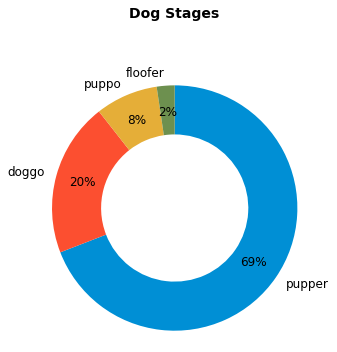

In [9]:
# code for the dog stage pie chart 
sorted_counts = df['dog_stage'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', pctdistance=0.78, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, textprops={'fontsize': 12})
plt.title('Dog Stages', y=1.18, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

In [17]:
# increase the width of colums so the text is fully displayed
pd.set_option('display.max_colwidth', -1)

In [18]:
# check the most liked tweet and the tweet date
print(df[df.favorite_count > (df.favorite_count.max()-1)]['tweet_url'])
print(df[df.favorite_count > (df.favorite_count.max()-1)]['tweet_datetime'])

tweet_datetime
2016-06-18 18:26:18    https://twitter.com/dog_rates/status/744234799360020481/video/1
Name: tweet_url, dtype: object
tweet_datetime
2016-06-18 18:26:18   2016-06-18 18:26:18
Name: tweet_datetime, dtype: datetime64[ns]


In [19]:
df.iloc[[1726]]

,tweet_id,tweet_datetime,tweet_source,tweet_content,tweet_url,rating_numerator,rating_denominator,dog_name,dog_stage,favorite_count,retweet_count,prediction_picture,prediction_breed,prediction_confidence,year
tweet_datetime,,,,,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,NaN,doggo,164611,83874,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador Retriever,0.825333,2016


### Part II - Top 10 Dog Names and Dog Breeds

There is a variety of dog names but four of them are the most popular: <i>**Cooper, Lucy, Oliver and Charlie**</i> which repeated 10 times.
<br>
<br><i>**Golden Retriever**</i> is the most popular breed on WeRateDogs. This breed has an unassailable lead in the ranking. There is not much of a surprise as both Labrador and Golden Retriever are also in the top of in the most popular dog breeds in the World.

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


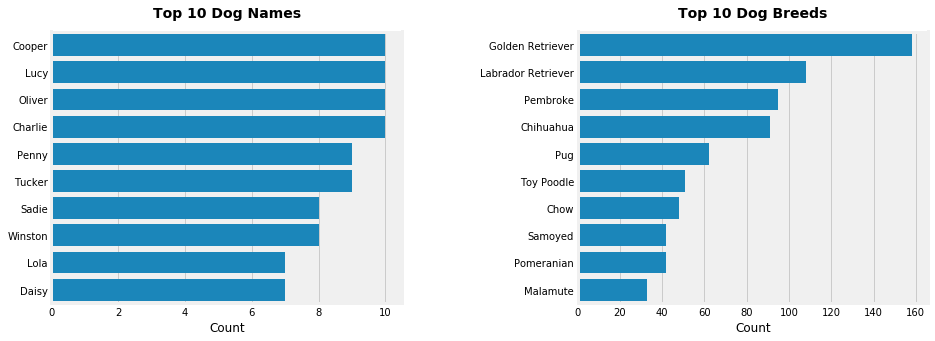

In [10]:
# code for top 10 dog names and dog breeds

fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5)
fig.set_size_inches(w=14,h=5)

basic_color = sns.color_palette()[0]

ax1 = sns.countplot(data=df, y=df.dog_name, order=df.dog_name.value_counts().iloc[:10].index,
            color = basic_color, ax=ax[0])
ax2 = sns.countplot(data=df, y=df.prediction_breed, order=df.prediction_breed.value_counts().iloc[:10].index,
            color = basic_color, ax=ax[1])

# set titles for each plot
ax1.set_title('Top 10 Dog Names', y=1.03, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})
ax2.set_title('Top 10 Dog Breeds', y=1.03, fontdict={'fontsize': 14, 'fontweight' : 'semibold'})

# set X labels for each plot
ax1.set_xlabel('Count')
ax2.set_xlabel('Count')

# set Y labels for each plot
ax1.set_ylabel('')
ax2.set_ylabel('')

fig.show();

### Part III - The most liked and retweeted dog in the dataset

The most retweeted and at the same time the most favourite dog in the dataset is a sweet Labrador Retriever who just figured out he can stand in the pool. The dog was rated 13/10 with the comment "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4".
<br>
<br>The tweet was retweeted 83,874 times and liked by 164,611 people.


### Part IV - Dogs are getting more likes and retweets

Right from the start in November 2015, WeRateDogs started gaining popularity (Who does not love dogs?), the number of retweets and likes growed intensively in the first months. After the initial period the growth stabilized, but is still positive. As we can see, number of retweets and likes are highly correlated (0.93), most probably due to the fact that the original tweets reached more people. The account has currently more than 7.5M followers.

In [1]:
# code for Rating and Favourite over years

plt.scatter(df.tweet_datetime, df.favorite_count, c='red', alpha=0.5, label='Favourite')
plt.scatter(df.tweet_datetime, df.retweet_count, c='orange', alpha=0.5, label='Retweets')
plt.title('Retweets & Likes increase over time', y=1.03)
plt.xlabel("Date")
plt.ylabel("Count")
plt.yscale("log")
plt.legend();

NameError: name 'plt' is not defined

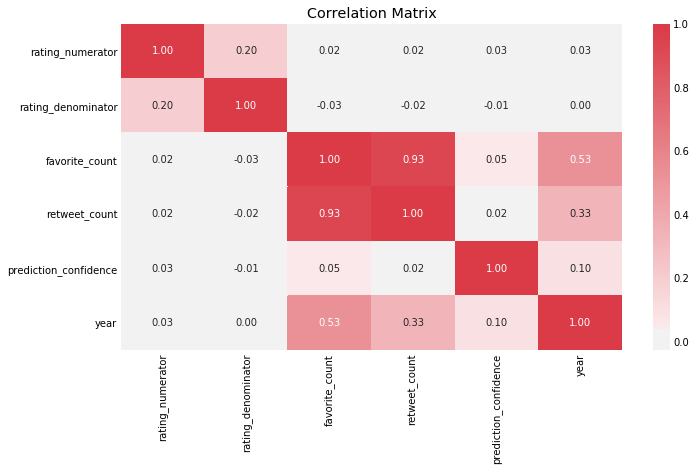

In [15]:
# code for the Correlation Matrix

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap, center = 0)
plt.title('Correlation Matrix');

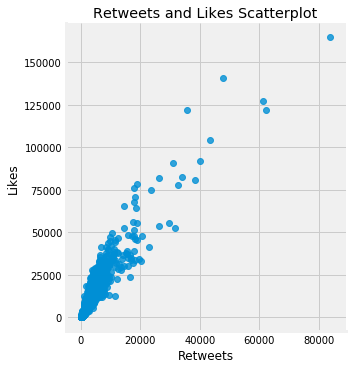

In [16]:
# code for Favourite vs Retweet count scatterplot
sns.lmplot(data=df, x="retweet_count", y="favorite_count", fit_reg=False)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Retweets and Likes Scatterplot');

### Part V - Dogs are getting greater ratings

The out of 1-10 scale rating system is an important part of the WeRateDogs. Dogs are usually rated higher than 10 and rates increased over years from about 9.3 in 2015 to 12.5 in 2017.
<br>
<br>**The ratings below 10 almost disappeared after the famous exchange with the Twitter user Brant:**
<br>On September 12th, 2016, Twitter user @brant took issue with the account's rating system, tweeting @dog_rates to tell them it didn't make any sense. @dog_rates replied with "they're good dogs Brent," purposefully misspelling @brant's name. 

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


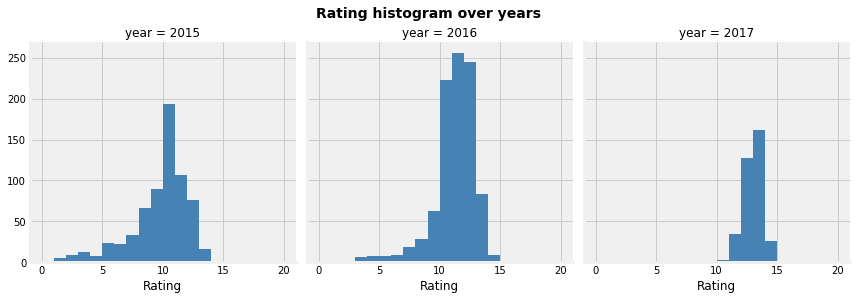

In [32]:
# code for Rating histogram over years

g = sns.FacetGrid(df, col="year", margin_titles=True, col_wrap=3, size=4)
bins = np.arange(0, 20+1, 1)
g.map(plt.hist, "rating_numerator", color="steelblue", bins=bins).set_axis_labels("Rating")
g.fig.suptitle('Rating histogram over years', y=1.03, fontsize=14, fontweight='semibold');

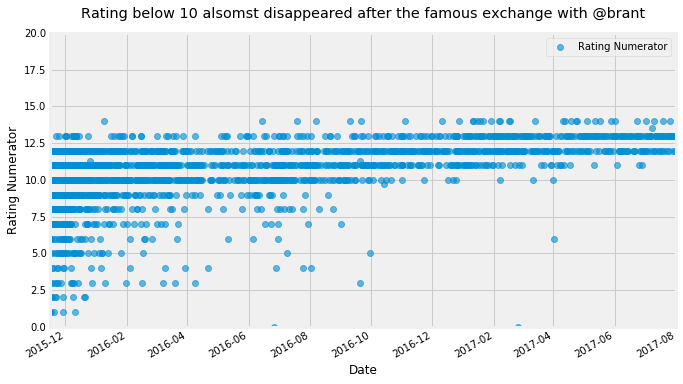

In [25]:
# code for Rating Numerator (disregarding outliers)
plt.rcParams['figure.figsize'] = (10, 6)
df.plot(y ='rating_numerator', ylim=[0,20], style = 'o', alpha = 0.6, label='Rating Numerator')
plt.title('Rating below 10 almost disappeared after the famous exchange with @brant', y=1.03)
plt.xlabel('Date')
plt.ylabel('Rating Numerator')
plt.legend();